# Galvanize Capstone Project - App Store Data
 
### - Albatool Alaqeel
### - Raghad Taleb

### Importing packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### <b> Part 1: Project Proposal Criteria 
#### Prepare an Abstract as both a Document and a PowerPoint (Start with 3 to 6 project ideas)

* Read the data

In [8]:
df = pd.read_csv("data/AppleStore.csv") #pd.read_csv("app-store-apple-data-set-10k-apps/AppleStore.csv")

In [9]:
df.head(2)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


####  - Check for nulls

In [10]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

####  - Drop <b>Unnamed: 0</b> column

In [11]:
df = df.drop(columns = 'Unnamed: 0')

#### - Convert size from Bytes to MB

In [12]:
df['size_MB'] = df['size_bytes'] / (1024 * 1024.0)

####  - Free/paid flag

In [13]:
df['isFree'] = np.where(df['price']==0, 'Free', 'Paid')

In [14]:
df.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_MB,isFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,Paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,Free


Let's talk about prices!
#### - What's the avg price for apps ?
    - There are outliars in the data. To identify them, we will boxplot the price data and see what are the outliars.

In [15]:
df['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

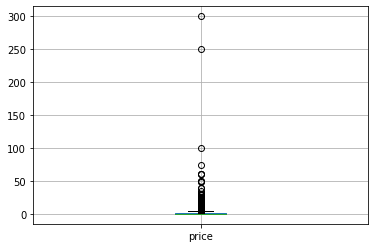

In [16]:
boxplot = df.boxplot(column=['price'])

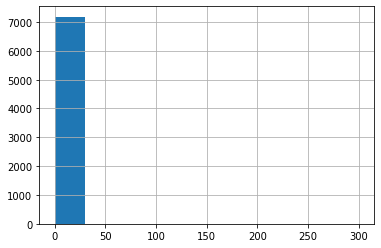

In [17]:
hist = df['price'].hist()

Let's see how many apps do we have that are above 30$

In [18]:
df[df['price']>30].count()

id                  13
track_name          13
size_bytes          13
currency            13
price               13
rating_count_tot    13
rating_count_ver    13
user_rating         13
user_rating_ver     13
ver                 13
cont_rating         13
prime_genre         13
sup_devices.num     13
ipadSc_urls.num     13
lang.num            13
vpp_lic             13
size_MB             13
isFree              13
dtype: int64

We only have 13 apps! If we draw a boxplot on data that is <b> less </b> than 30$

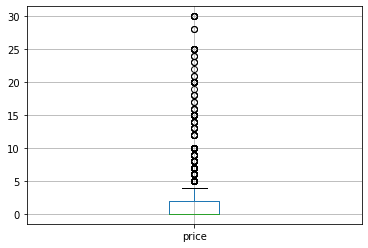

In [19]:
boxplot = df[df['price']<30].boxplot(column=['price'])

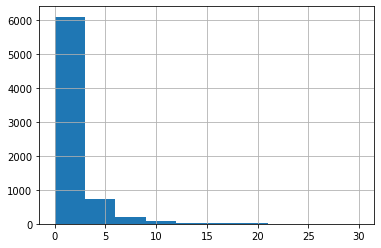

In [20]:
hist = df[df['price']<30].price.hist()

ok there are still outliars when plotting apps that are less than 30$. Seems like the box stops at 5. so let's see the data

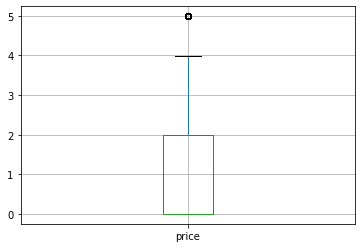

In [21]:
boxplot = df[df['price']<5].boxplot(column=['price'])

There are still outliars. Let's see how many apps there is that are less than 5$

In [22]:
df[df['price']>=5].price.describe()

count    438.000000
mean      12.222877
std       20.145140
min        5.990000
25%        6.990000
50%        7.990000
75%        9.990000
max      299.990000
Name: price, dtype: float64

In [23]:
df[df['price']<5].count()[0]

6759

In [24]:
df[df['price']<5].price.describe()

count    6759.000000
mean        1.046008
std         1.543686
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max         4.990000
Name: price, dtype: float64

In [25]:
print("percentage of apps that are less than 5$ is: %{0:.2f}".format((df[df['price']>=5].count()[0]/df[df['price']<5].count()[0])*100))

percentage of apps that are less than 5$ is: %6.48


~ 6.5%! seems like a lot. We will stick to the apps that are less than <b><i> $30 </i></b>

#### we will use only the data with price less than 30$

In [26]:
df = df[df['price']<30]

In [27]:
df.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_MB,isFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,Paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,Free
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188,Free


####  -  What's the Average price now after removing apps that are more than $30

In [28]:
#-- the average is:
print("Average price is: ${0:.2f}".format(df['price'].mean()))

Average price is: $1.57


####  - Let's compare the number of <b>free</b> vs <b>paid</b>

In [29]:
price_df = pd.DataFrame({"number_of_apps":  [df[df['isFree']=='Free']["id"].count(), df[df['isFree']=='Paid']["id"].count()]
                        ,"price":["Free", "Paid"]
                        })

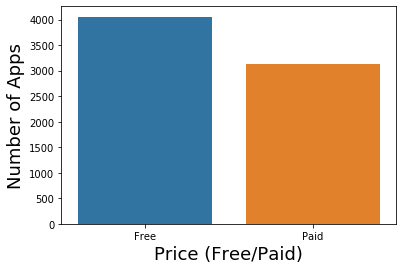

In [92]:
plt.figure()
sns.barplot(x=price_df["price"],y=price_df['number_of_apps'])
plt.gca().set_xlabel("Price (Free/Paid)", fontsize=18)
plt.gca().set_ylabel("Number of Apps", fontsize=18)
plt.show()

Free apps are more than paid!

####  - content (age) distribution

In [86]:
content_df = df.groupby(["cont_rating"])['id'].count().to_frame(name = 'Count').reset_index()
content_df = content_df.sort_values(by = 'Count', ascending=False) 

In [87]:
genre_df

,cont_rating,Count
2,4+,4422
0,12+,1154
3,9+,986
1,17+,622


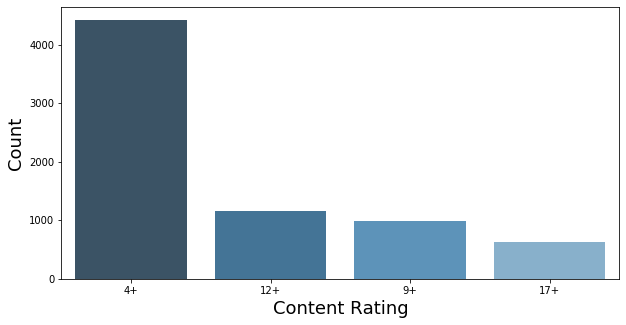

In [111]:
plt.figure(figsize=(10, 5))
sns.barplot(x=content_df["cont_rating"],y=content_df['Count'], palette="Blues_d") 
plt.gca().set_xlabel("Content Rating", fontsize=18)
plt.gca().set_ylabel("Count", fontsize=18)
plt.show()

#### - Content vs. prices 

In [31]:
df.groupby(["cont_rating",'isFree'])['id'].count()

cont_rating  isFree
12+          Free       705
             Paid       449
17+          Free       447
             Paid       175
4+           Free      2466
             Paid      1956
9+           Free       438
             Paid       548
Name: id, dtype: int64

In [94]:
g1 = df.groupby(["cont_rating",'isFree'])['id'].count().unstack().reset_index()
g1 = g1.set_index("cont_rating")
g1

isFree,Free,Paid
cont_rating,,
12+,705,449
17+,447,175
4+,2466,1956
9+,438,548


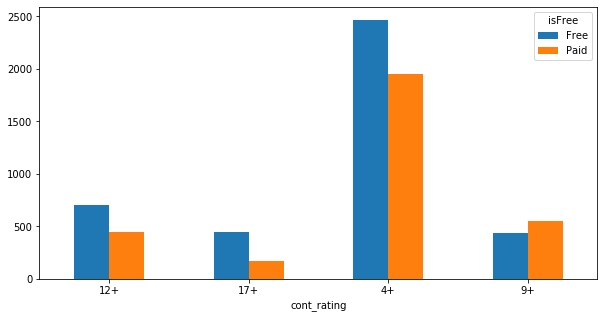

In [95]:
ax = g1.plot.bar(rot=0,figsize=(10,5))

We see that apps that are that are rated 4+ are more in number.

Surprisingly, apps that are 9+ are more when it comes to paid apps!

### Let's tallk categories!

In [78]:
id_genre_df = df.groupby(["prime_genre"])['id'].count().to_frame(name = 'Count').reset_index()
id_genre_df = id_genre_df.sort_values(by = 'Count', ascending=False) 

In [79]:
id_genre_df

,prime_genre,Count
7,Games,3862
4,Entertainment,535
3,Education,449
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,177
18,Social Networking,167
9,Lifestyle,144
11,Music,135


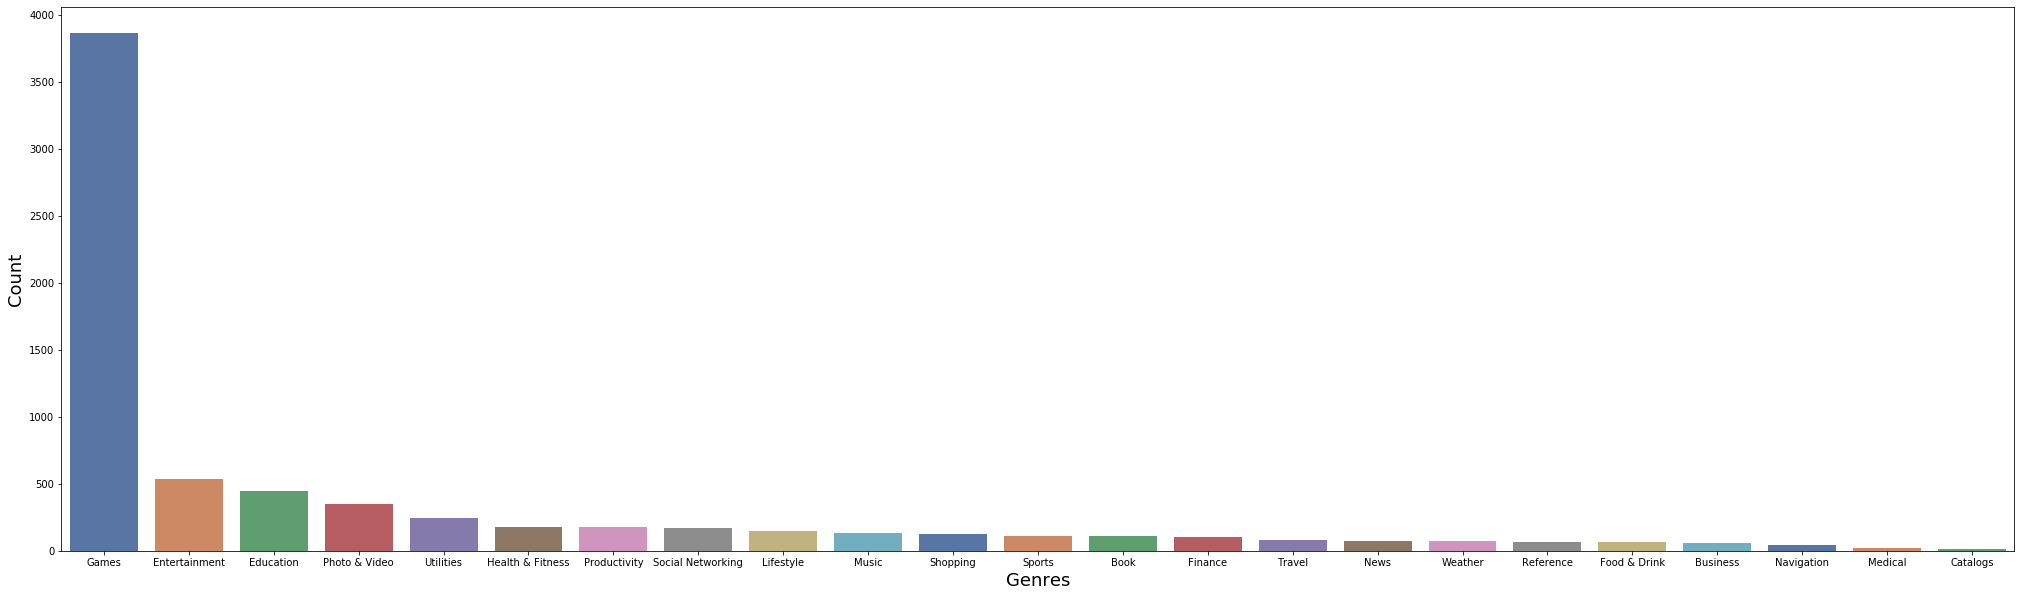

In [120]:
plt.figure(figsize=(35, 10))
sns.barplot(x=id_genre_df["prime_genre"],y=id_genre_df['Count'], palette="deep") 
plt.gca().set_xlabel("Genres", fontsize=18)
plt.gca().set_ylabel("Count", fontsize=18)
plt.show()

### As we predicted, the top category is Games
Now we will go into details such as <b>price</b> and <b>size</b> 

####  - categories vs. price: top categories and does price affect it popularities? (Is free more popular?)

In [36]:
genre_and_price_vs_raing_df = df.groupby(["prime_genre",'isFree'])['user_rating'].mean().unstack()
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.reset_index()
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.set_index("prime_genre")

In [37]:
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.sort_values(by = 'Paid', ascending=False) 

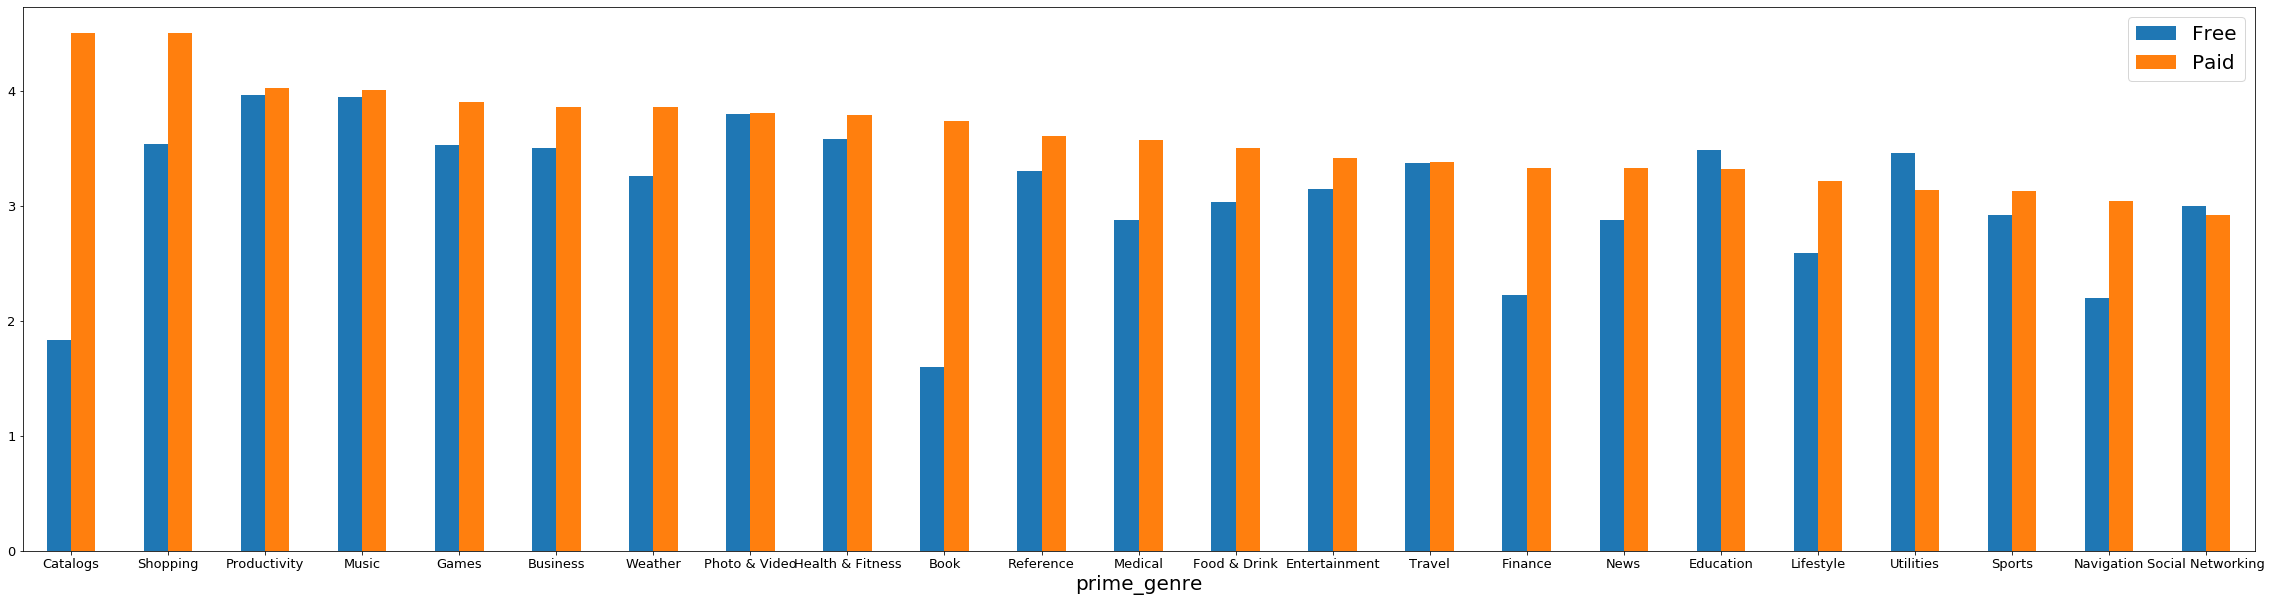

In [106]:
ax = genre_and_price_vs_raing_df.plot.bar(rot = 0, figsize = (40, 10),fontsize = 13)
ax.legend(fontsize = 20)
ax.xaxis.label.set_size(20)

### Same category, similar rating
We can notice that there is a gap in rating when it comes to Catalogs and Books, this could be due copyrights

####  - paid apps and user rating. Is the money worth it?

In [39]:
price_vs_raing_df = df.groupby('price')['user_rating'].mean().to_frame(name = 'Average Rating').reset_index()

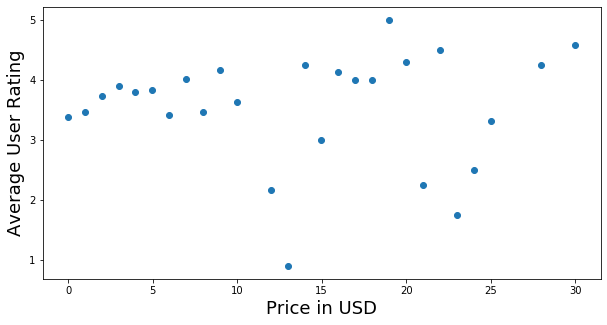

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(price_vs_raing_df['price'], price_vs_raing_df['Average Rating'])
plt.gca().set_xlabel("Price in USD", fontsize=18)
plt.gca().set_ylabel("Average User Rating", fontsize=18)
plt.show()

#### Hmmmm...
Apperantly there is <b>no correlation</b> between rating and price.

- size and categories distribution

In [42]:
genre_vs_size_df = df.groupby(["prime_genre"])['size_MB'].mean().to_frame(name = 'Average Size in MB').reset_index()
genre_vs_size_df = genre_vs_size_df.sort_values(by = 'Average Size in MB', ascending=False) 

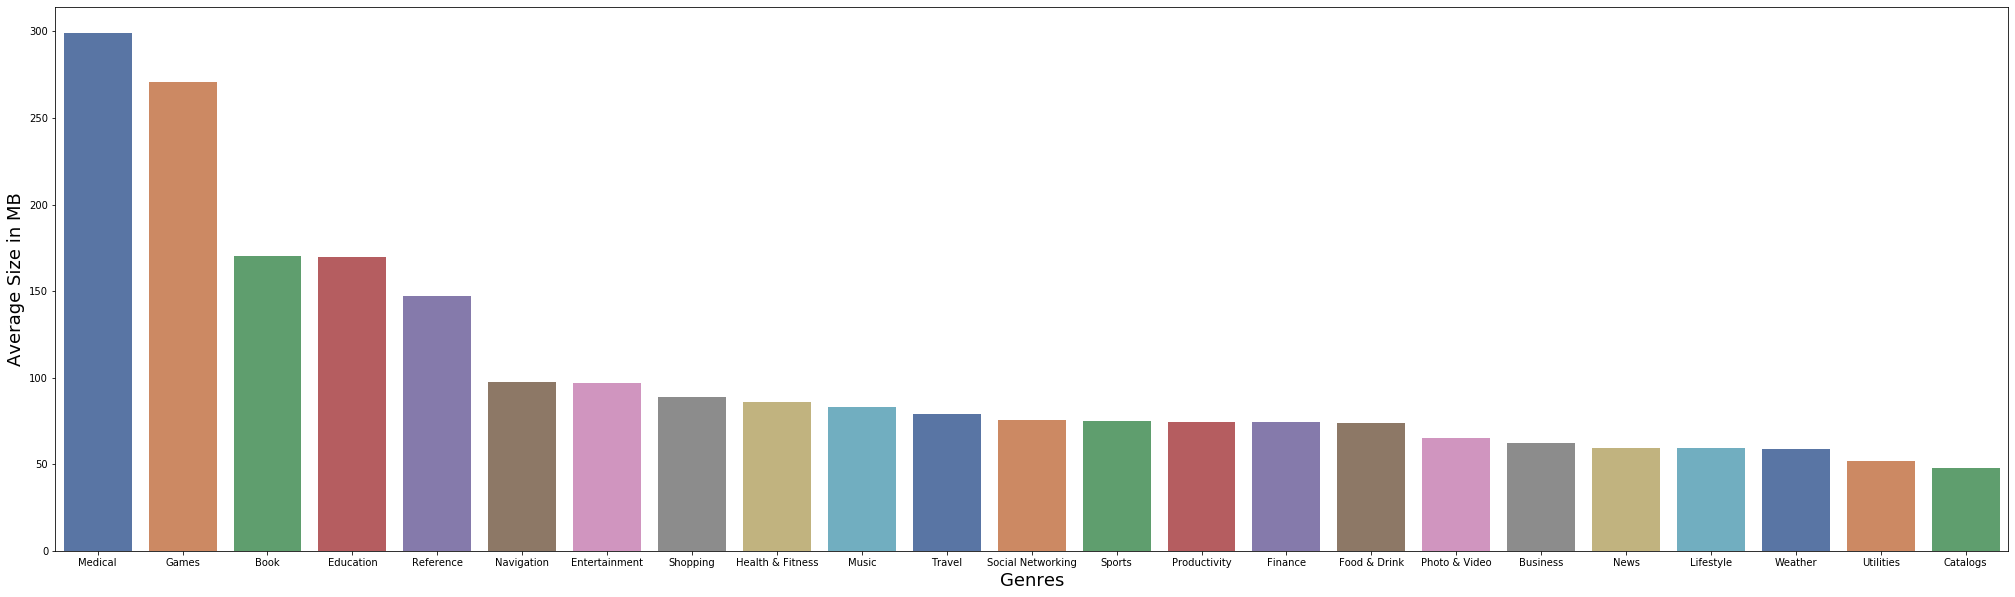

In [119]:
plt.figure(figsize=(35, 10))
sns.barplot(x=genre_vs_size_df["prime_genre"],y=genre_vs_size_df['Average Size in MB'], palette="deep") 
plt.gca().set_xlabel("Genres", fontsize=18)
plt.gca().set_ylabel("Average Size in MB", fontsize=18)
plt.show()

### More content, bigger size! 
#### Let's dig deeper 

In [44]:
genre_and_price_vs_size_df = df.groupby(["prime_genre",'isFree'])['size_MB'].mean().unstack()
genre_and_price_vs_size_df = genre_and_price_vs_size_df.reset_index()
genre_and_price_vs_size_df = genre_and_price_vs_size_df.set_index("prime_genre")

In [47]:
genre_and_price_vs_size_df = genre_and_price_vs_size_df.sort_values(by = 'Paid', ascending=False) 

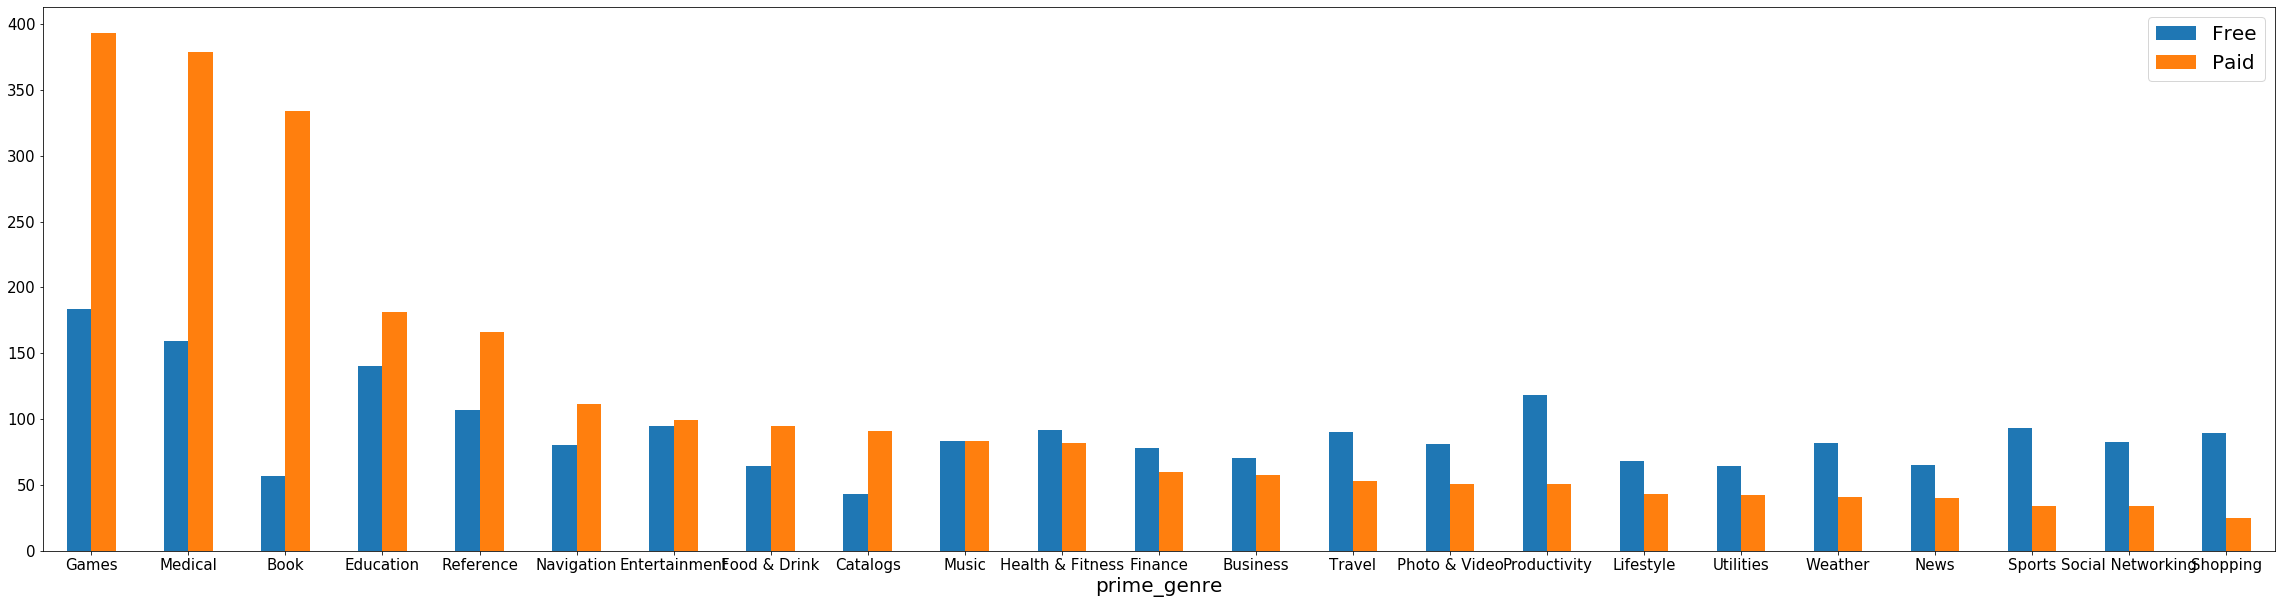

In [110]:
ax = genre_and_price_vs_size_df.plot.bar(rot = 0, figsize = (40, 10), fontsize=15)
ax.legend(fontsize = 20)
ax.xaxis.label.set_size(20)

#### So, what do we notice here?
##### The size of paid Games, Book, and Medical apps are more than 2 times than that of free ones, why is that?
* For Medical and Books, more size means more information so it is logical that you pay more for information.
* As for Games, price is responsible for high quality graphic and sounds.

### <b>Part 2: Perform Exploratory Data Analysis, Visualizations, and Feature Engineering

In [171]:
df['rating_count_before'] = df['rating_count_tot'] - df['rating_count_ver']
df['isNotFree'] = df['price'].apply(lambda x: 1 if x > 0 else 0)

In [172]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_MB,isFree,rating_count_before,isNotFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,Paid,21266,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,Free,161039,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188,Free,185761,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,122.558594,Free,261592,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,88.476562,Free,980600,0


### <b>Part 3: Perform Machine Learning, Performance Metrics, and Deployment for your project

## Success prediction 
#### We will use machine learning to predict the success of an app using rating

In [222]:
df_train = df[['size_MB', 'isNotFree', 'price', 'rating_count_tot', 'sup_devices.num', 'lang.num', 'prime_genre', 'cont_rating', 'ipadSc_urls.num']]
target = df['user_rating']

In [223]:
df_train = pd.get_dummies(df_train)

### What's going on?
* Set a binary variable to predict success of apps, an app that has more than 4 user_rating is succeful

In [224]:
def categorize_rating(x):
    if x <= 4:
        return 0
    else:
        return 1

In [225]:
target = target.apply(categorize_rating)

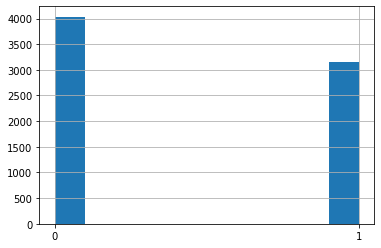

In [226]:
target.astype(str).hist()

In [227]:
target

0       0
1       0
2       0
3       0
4       1
       ..
7192    1
7193    1
7194    1
7195    1
7196    1
Name: user_rating, Length: 7184, dtype: int64

In [249]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=None, stratify=target)

In [250]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5747, 34)
X_test shape: (1437, 34)


* We will use different calssifiers 

In [251]:
models = [RandomForestClassifier(), LGBMClassifier(), XGBClassifier()]

In [252]:
kfold = KFold(n_splits=5, random_state=None)

In [253]:
all_classifiers = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

In [254]:
for i, model in enumerate(models):
    classifier = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score = True)
#     print(cv_result)
#     break
    all_classifiers.loc[i, 'Classfier_name'] = model.__class__.__name__
    all_classifiers.loc[i, 'train_score'] = cv_result['train_score'].mean()
    all_classifiers.loc[i, 'test_score'] = cv_result['test_score'].mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [255]:
cv_result

{'fit_time': array([0.61978388, 0.72399473, 0.59750605, 0.58098197, 0.56096411]),
 'score_time': array([0.00325489, 0.00286388, 0.0026679 , 0.00256515, 0.00253916]),
 'test_score': array([0.6973913 , 0.69913043, 0.68929504, 0.69712794, 0.69364665]),
 'train_score': array([0.72612573, 0.73025886, 0.73118747, 0.73096999, 0.73010004])}

In [256]:
all_classifiers

,Classfier_name,train_score,test_score
0,RandomForestClassifier,0.983165,0.662951
1,LGBMClassifier,0.850966,0.69775
2,XGBClassifier,0.729728,0.695318


### What does this tell us?
* For this approach, the prediction accuracy is about 70% for the three classifiers.
* In the future we can integerate more data and features to improve the performance.

## Predicting version rating
#### We will use machine learning to predict the rating of the latest version based on the overall rating

We will do <b> Linear Regerssion  </b> on total user rating and user rating for the latest version.

Label data will be the total user rating. 

Training + testing will be on the latest version of the users' rating.

In [54]:
#-- creating the LR using sklearn
lr = LinearRegression()

In [120]:
# label is global sales
label = df['user_rating']

In [121]:
#--check the label
label

0       4.0
1       4.0
2       3.5
3       4.0
4       4.5
       ... 
7192    4.5
7193    4.5
7194    4.5
7195    4.5
7196    5.0
Name: user_rating, Length: 7184, dtype: float64

split the data into train and test using <b> train_test_split </b>  from sklearn

In [138]:
X_train, X_test, y_train, y_test = train_test_split(df[['user_rating_ver']], label, test_size = 0.6, random_state = 55)

In [139]:
lr_X_train=X_train
lr_X_test=X_test
lr_y_train=y_train
lr_y_test=y_test

Fit the data

In [140]:
lr.fit(lr_X_train, lr_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lr_score_train = lr.score(lr_X_train, lr_y_train)
lr_score_test = lr.score(lr_X_test, lr_y_test)
print("Train score: %{}".format(lr_score_train*100))
print("Test score:  %{}".format(lr_score_test*100))

Train score: %61.19480728846298
Test score:  %59.26360472608976


In [160]:
y_pred = lr.predict(lr_X_test)

Drawing a plot figure to get more insights

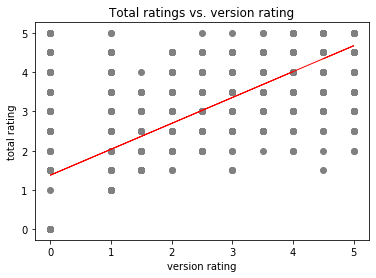

In [162]:
plt.scatter(lr_X_test, lr_y_test,  color='gray')
plt.plot(lr_X_test, y_pred, color='red', linewidth=1)

plt.title("Total ratings vs. version rating")
plt.xlabel("version rating")
plt.ylabel("total rating")

plt.show()

After plotting, we see that the rating data isn't big enough to provide insights. Although we got a ~60% accuracy yet we can't rely on such results

### <b>Part 4: Present your project as a Presentation to your business stakeholders

### <b>Part 5: Submit your project for your Advisors and business stakeholders